# HADISST Baby Coral

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr

In [2]:
# This script does the following:

# Decompresses the .nc.gz file into a temporary file.
# Opens the decompressed file using the netCDF4 library.
# Prints the dataset information.
# Closes the dataset when done.
# Optionally deletes the temporary file to clean up.

import gzip
import netCDF4 as nc
import tempfile

# Path to your .nc.gz file
input_file = '/data9/GR6901/work/pyk2106/BabyCoral/HADISST/HadISST_sst.nc.gz'

# Create a temporary file to store the decompressed data
with tempfile.NamedTemporaryFile(delete=False) as tmpfile:
    # Decompress the .gz file
    with gzip.open(input_file, 'rb') as f_in:
        tmpfile.write(f_in.read())
    tmpfile_path = tmpfile.name

# Open the decompressed NetCDF file
dataset = nc.Dataset(tmpfile_path, 'r')

# Now you can work with the dataset
print(dataset)

# Close the dataset when done
dataset.close()

# Optionally, delete the temporary file
import os
os.remove(tmpfile_path)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Title: Monthly version of HadISST sea surface temperature component
    description: HadISST 1.1 monthly average sea surface temperature
    institution: Met Office Hadley Centre
    source: HadISST
    reference: Rayner, N. A., Parker, D. E., Horton, E. B., Folland, C. K., Alexander, L. V., Rowell, D. P., Kent, E. C., Kaplan, A.  Global analyses of sea surface temperature, sea ice, and night marine air temperature since the late nineteenth century J. Geophys. Res.Vol. 108, No. D14, 4407 10.1029/2002JD002670
    Conventions: CF-1.0
    history: 13/7/2024 converted to netcdf from pp format
    supplementary_information: Updates and supplementary information will be available from http://www.metoffice.gov.uk/hadobs/hadisst
    comment: Data restrictions: for academic research use only. Data are Crown copyright see (http://www.opsi.gov.uk/advice/crown-copyright/copyright-guidance/index.htm

In [11]:
import gzip
import xarray as xr
import tempfile
import os

# Path to your .nc.gz file
input_file = '/data9/GR6901/work/pyk2106/BabyCoral/HADISST/HadISST_sst.nc.gz'

# Create a temporary file to store the decompressed data
with tempfile.NamedTemporaryFile(delete=False, suffix='.nc') as tmpfile:
    with gzip.open(input_file, 'rb') as f_in:
        tmpfile.write(f_in.read())
    tmpfile_path = tmpfile.name

# Open the decompressed NetCDF file as an xarray Dataset and drop the 'time_bnds' variable
dataset = xr.open_dataset(tmpfile_path, drop_variables='time_bnds')

# Define the target latitude and longitude
target_lat = 26.144225
target_lon = -80.09816

# Define the time range
start_date = '2001-01-01'
end_date = '2023-08-31'

# Slice the data to get the specific location and time range
HADISST_babycoral = dataset.sel(latitude=target_lat, longitude=target_lon, method='nearest').sel(time=slice(start_date, end_date))

# Display the sliced data
HADISST_babycoral

<xarray.Dataset> Size: 3kB
Dimensions:    (time: 272)
Coordinates:
  * time       (time) datetime64[ns] 2kB 2001-01-16T12:00:00 ... 2023-08-16T1...
    latitude   float32 4B 26.5
    longitude  float32 4B -80.5
Data variables:
    sst        (time) float32 1kB ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    13/7/2024 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

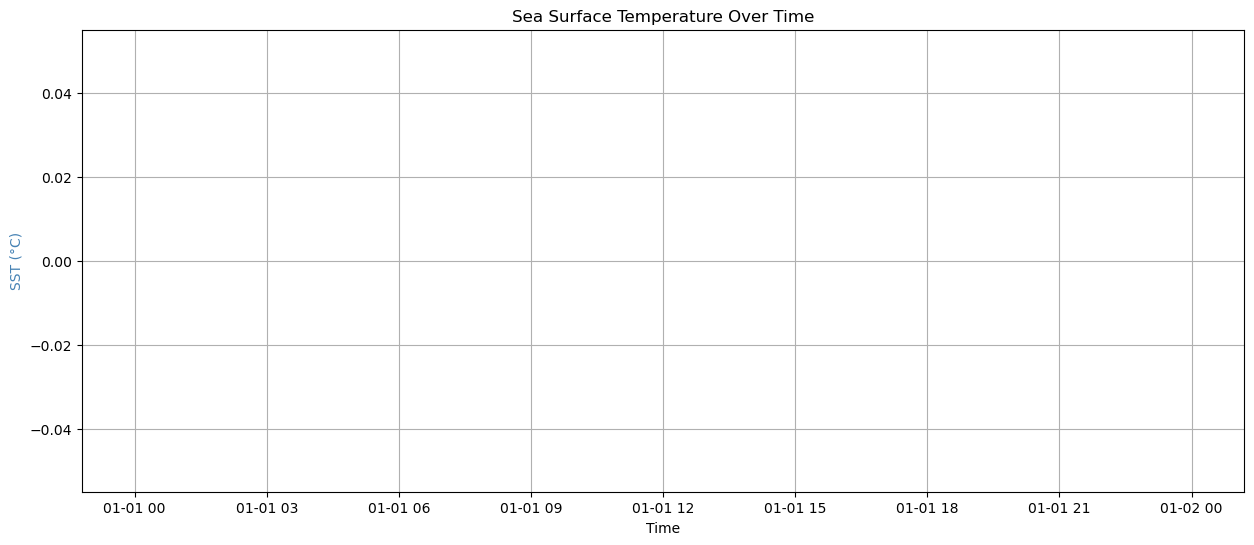

In [15]:
import matplotlib.pyplot as plt

# Create a new figure and axis sharing the same x-axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Select the specific DataArray for sea surface temperature
sst_data = HADISST_babycoral['sst']  # Adjust the variable name if different

# Plot SST on the primary y-axis
ax1.plot(sst_data['time'].values, sst_data.values, color='steelblue')  # Ensure we use .values for both
ax1.set_xlabel('Time')
ax1.set_ylabel('SST (°C)', color='steelblue')
ax1.set_title('Sea Surface Temperature Over Time')

# Optional: Add grid and legend
ax1.grid()
plt.show()

plt.show()

In [7]:
# Note that HADISST lat is in degrees_north and lon is in degrees_east
# This is the entire HADISST before slicing
dataset

<xarray.Dataset> Size: 480MB
Dimensions:    (time: 1853, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 15kB 1870-01-16T11:59:59.505615234 ... 2...
  * latitude   (latitude) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 1kB -179.5 -178.5 -177.5 ... 178.5 179.5
Data variables:
    sst        (time, latitude, longitude) float32 480MB ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    13/7/2024 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

Time values: ['2001-01-16T12:00:00.000000000' '2001-02-15T00:00:00.000000000'
 '2001-03-16T12:00:00.000000000' '2001-04-16T00:00:00.000000000'
 '2001-05-16T12:00:00.000000000' '2001-06-16T00:00:00.000000000'
 '2001-07-16T12:00:00.000000000' '2001-08-16T12:00:00.000000000'
 '2001-09-16T00:00:00.000000000' '2001-10-16T12:00:00.000000000']
SST values: [nan nan nan nan nan nan nan nan nan nan]


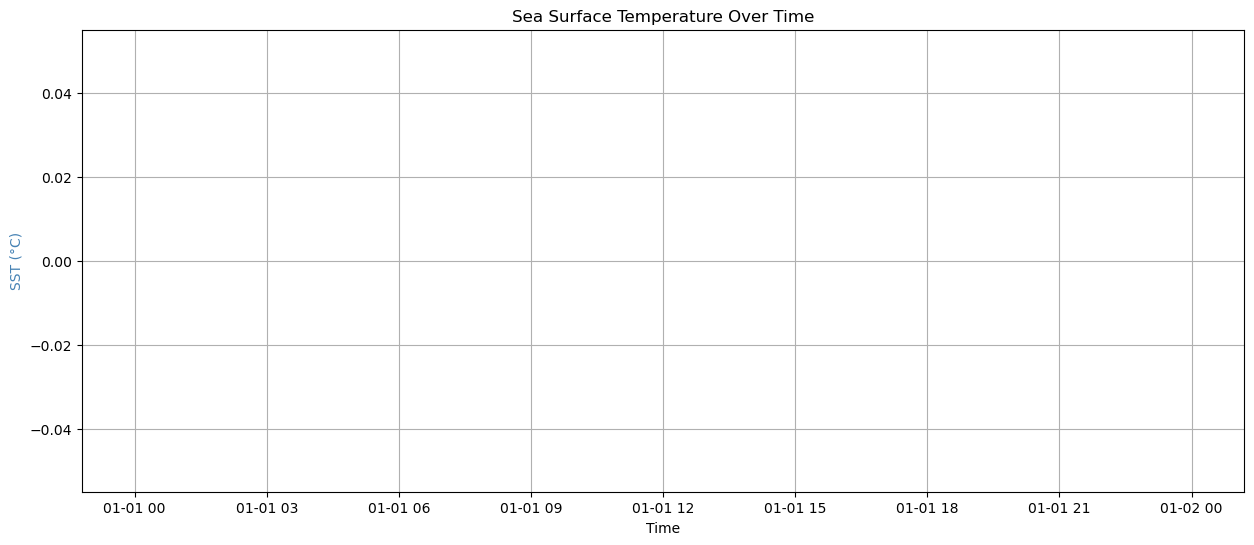

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure and axis sharing the same x-axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Select the specific DataArray for sea surface temperature
sst_data = HADISST_babycoral['sst']

# Ensure time and sst values are valid
time_values = sst_data['time'].values
sst_values = sst_data.values

# Print the first few values to debug
print("Time values:", time_values[:10])
print("SST values:", sst_values[:10])

# Check for NaN or infinite values
if np.any(np.isnan(sst_values)):
    print("Warning: NaN values detected in SST data")
if np.any(np.isinf(sst_values)):
    print("Warning: Infinite values detected in SST data")

# Plot SST on the primary y-axis
ax1.plot(time_values, sst_values, color='steelblue')
ax1.set_xlabel('Time')
ax1.set_ylabel('SST (°C)', color='steelblue')
ax1.set_title('Sea Surface Temperature Over Time')

# Optional: Add grid and legend
ax1.grid()
plt.show()


In [18]:
HADISST_babycoral.sst

<xarray.DataArray 'sst' (time: 272)> Size: 1kB
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2kB 2001-01-16T12:00:00 ... 2023-08-16T1...
    latitude   float32 4B 26.5
    longitude  float32 4B -80.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean